In [ ]:
'''
-->Agar ek negative point positive region mae hai to app uskae cordinates kae last mae 1 laga kae (x,y,1),
line kae (Ax,Bx,c) coefficents sae subtract karengae and resultant coeficient ki line is new line

-->Agar ek positive point negetive region mae hai to app uskae cordinates kae last mae 1 laga kae (x,y,1),
line kae (Ax,Bx,c) coefficents sae add karengae and resultant coeficient ki line is new line

note the thing that this cordinates are first multiplied by learning rate so,
there is not a larger change in line
'''

In [1]:
from sklearn.datasets import make_classification
import numpy as np

X,y = make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,n_classes=2,
                          n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=10)

In [2]:
X

array([[ 0.19924745, -0.11697552],
       [-0.24882029, -0.73115232],
       [-0.3544904 , -0.7081059 ],
       [-1.59086506, -2.01199214],
       [-0.20083951,  1.63493163],
       [-0.83241122,  0.15599044],
       [-1.79207014,  1.07782053],
       [ 0.0856607 ,  0.80626713],
       [-0.55865299,  0.74859527],
       [-1.95974262,  0.75152794],
       [-1.77828947, -0.90114581],
       [-1.77985853, -0.1815243 ],
       [-0.02194151, -2.98092432],
       [ 0.80563431,  1.20500136],
       [-1.82701214,  0.78302407],
       [ 0.38730728,  0.42968688],
       [-0.14108668, -0.73229726],
       [-1.87955941, -0.83930476],
       [-0.18232911,  0.83727062],
       [-1.77059533, -0.10255323],
       [-2.27658028,  0.65867001],
       [-2.06519502,  0.92649819],
       [-1.31690551,  0.10216193],
       [ 1.61043259,  0.46886454],
       [-1.21650394,  0.45432938],
       [ 0.6139723 ,  1.8613386 ],
       [-1.78760957, -0.79255991],
       [-1.04149161, -1.0004391 ],
       [-2.40067584,

In [3]:
y

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1])

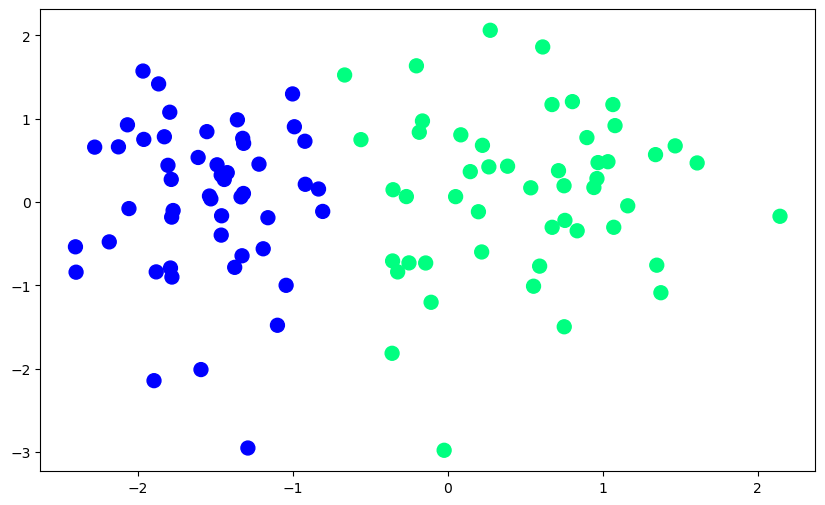

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [8]:
def step(z):
    return 1 if z > 0 else 0

In [12]:
#Applying precepetron trick

def preceptron(X,y):
    #inserting 1 to column 1 in x for the c value x0
    X = np.insert(X,0,1,axis=1)
    #creating weights with one in starting of shape like X
    weights = np.ones(X.shape[1])
    lr = 0.1#learning rate
    
    for i in range(1000):
        j = np.random.randint(0,100)
        #getting a predicted value dot product of random X row and weights and if positive return 1 and negetive 0
        y_hat = step(np.dot(X[j],weights))
        # now applying the formula for the updation in weights 
        weights = weights + lr * (y[j] - y_hat) * X[j]
        
        
    return weights[0],weights[1:]
        

In [13]:
intercept_, coef_ = preceptron(X,y)

In [14]:
print(intercept_)
print(coef_)

0.9
[1.36737252 0.02083421]


In [15]:
#Ax + By + C = 0 line equation so we get m and b by
'''
m = -A / B
b = -C / B
'''
#putting this in formula

m = -(coef_[0] / coef_[1])
b = -(intercept_ / coef_[1])

In [16]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input+b

(-3.0, 2.0)

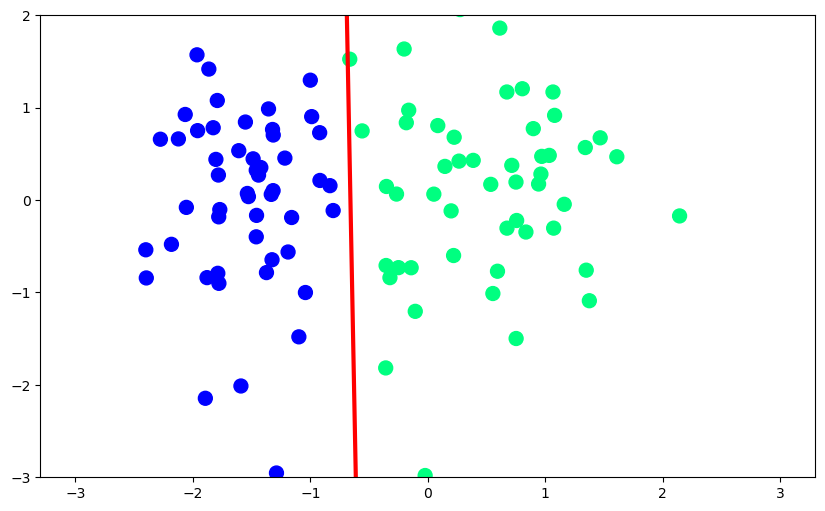

In [17]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)


In [ ]:
'''but this preceptron trick has issue as the sepration is increase between classes it can be biased to one class,
cause it stops to improve after the process (as it is assinged to improve as per points or classify the points)

butthe sklearn library one tries to improve after also and drawsuitable line which can be good for both classes with low loss function  

b
'''